# **Entanglement Measurement**

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from math import pi
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister, execute
from qiskit.tools.visualization import circuit_drawer
from qiskit.quantum_info import state_fidelity
from qiskit import BasicAer

backend = BasicAer.get_backend('unitary_simulator')

#pick random theta
theta=np.random.randn()
print("theta",theta)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


theta 0.7886082589618045


## **Simplfied Interferometry**

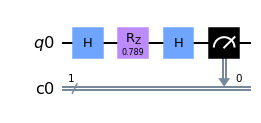

In [2]:
q = QuantumRegister(1)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)


qc.h(q[0])
qc.rz(theta,q[0])
qc.h(q[0])
qc.measure(q,c)
qc.draw()

In [3]:
backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'0': 862, '1': 162}

## **Entangled measurements**

In [4]:
theta = 1.5

q = QuantumRegister(3)
c = ClassicalRegister(1)
qc = QuantumCircuit(q,c)

qc.h(q[0])
qc.cx(q[0],q[1])
qc.cx(q[0],q[2])
qc.rz(theta,q[0])
qc.rz(theta,q[1])
qc.rz(theta,q[2])
qc.cx(q[0],q[2])
qc.cx(q[0],q[1])
qc.h(q[0])
qc.measure(q[0],c)
qc.draw()

backend = BasicAer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=1024)
job.result().get_counts(qc)

{'1': 629, '0': 395}